<h1>SNA : Sûreté Aérienne 1<h1>
<h3>Ilias SAGHIR, Salaheddine ELKADIRI<h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

<h3>Simulation<h3>

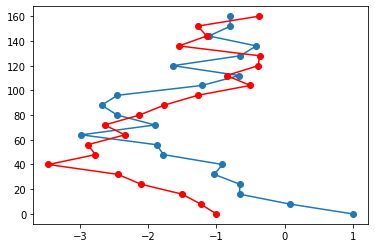

True


In [2]:
#Simulation (trajectoires parallèles)

sigma_c=1
r_c=1/57
v=8
r_a=0
a=0.1 #seuil de collision

cov_c=np.zeros((20,20)) #covariance cross track

for s in range(20):
    cov_c[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    for t in range(s):
        cov_c[t,s]=cov_c[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)
        
cov_a=np.zeros((20,20)) #covariance along track

for s in range(20):
    for t in range(s+1):
        cov_a[t,s]=cov_a[s,t]=(r_a**2)*((t+1)**2)
        
        

#simulation

d=2 #distance entre avions

X1=np.append(0,np.random.multivariate_normal(np.zeros(20), cov_c))+d/2
X2=np.append(0,np.random.multivariate_normal(np.zeros(20), cov_c))-d/2
Y1=np.append(0,np.random.multivariate_normal(np.zeros(20), cov_a))+v*np.arange(21)
Y2=np.append(0,np.random.multivariate_normal(np.zeros(20), cov_a))+v*np.arange(21)

plt.plot(X1,Y1,marker="o")
plt.plot(X2,Y2,'red',marker="o")
plt.show()
Z=np.min(((X1-X2)**2+(Y1-Y2)**2))<a**2 #Collision ou non


print(Z)

<h3>Monté Carlo Naïf<h3>

In [3]:
#MC Naïf

d=5

N=1000000
X1=np.random.multivariate_normal(np.zeros(20), cov_c,size=N)+d/2
X2=np.random.multivariate_normal(np.zeros(20), cov_c,size=N)-d/2
Y1=np.random.multivariate_normal(np.zeros(20), cov_a,size=N)
Y2=np.random.multivariate_normal(np.zeros(20), cov_a,size=N)

Z=np.min((X1-X2)**2+(Y1-Y2)**2,axis=1)<a**2

p=np.mean(Z)

print(p,p*(1-p),2*((p*(1-p)/N)**0.5)) #proba, variance et erreur

0.001178 0.001176612316 6.860356597145662e-05


<h3>Allures de moyennes pour le changement<h3>

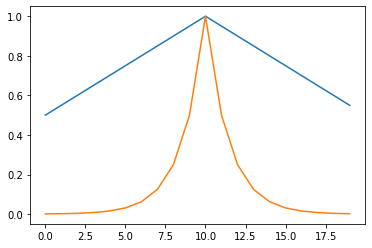

In [4]:
#définition de "moyennes types" pour le changement de moyenne 

def u(i):          #pic linéaire
    u=np.array([1-abs(i-t)/20 for t in range(20)])
    return u.reshape(20,1)
def u_exp(i):      #pic exponentiel
    u=np.array([1/(2**abs(i-t)) for t in range(20)])
    return u.reshape(20,1)

plt.plot(u(10))
plt.plot(u_exp(10))
plt.show()

<h3>Changement de moyenne<h3>

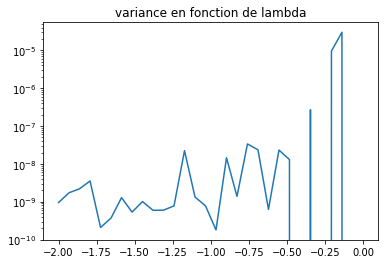

In [7]:
#Choix lambda optimal :

d=7
mu=np.zeros((20,1))+d/2
N=4000
lambdas=np.linspace(-2,0,30)
X=np.random.randn(20,N)
Y=np.random.multivariate_normal(np.zeros(20), 2*cov_a,size=N)
l=[]
for lbda in lambdas:
    teta=np.zeros((20,1))
    teta=lbda*(u(20))
    r=np.exp(-teta.T.dot(X)-0.5*teta.T.dot(teta))
    Z=np.min((((2**0.5)*scipy.linalg.sqrtm(cov_c).dot(X+teta)+2*mu)**2+Y.T**2)**0.5,axis=0)<a
    l.append(np.mean((Z*r)**2)-np.mean(Z*r)**2)
    
plt.plot(lambdas,l)
plt.title('variance en fonction de lambda')
plt.yscale('log')
plt.show()

Nous utilisons un changement de moyenne de type croissance linéaire (allure 1)

Ici, le choix optimal est $\lambda \approx -1.5$ 

3.634128343702977e-08 6.4381015610746465e-12


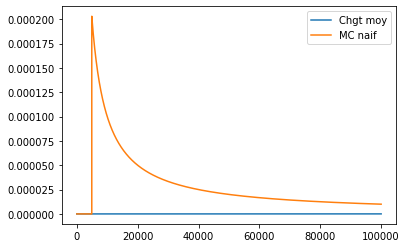

In [12]:
d=

N=100000 #nb de simulations

X=np.random.randn(20,N) 
Y=np.random.multivariate_normal(np.zeros(20), 2*cov_a,size=N) #vecteur différence entre coordonnées along-track
l=[]
lbda=-1.5
teta=lbda*(u(20))

r=np.exp(-teta.T.dot(X)-0.5*teta.T.dot(teta))
A=(((2**0.5)*scipy.linalg.sqrtm(cov_c).dot(X+teta)+2*mu)**2+Y.T**2)<a**2
k=10
Z=(np.sum(A[:k,:],axis=0)==0)*(A[k]==1) #si on s'interesse à calculer P(T=k+1)

#Z=np.min((((2**0.5)*scipy.linalg.sqrtm(cov_c).dot(X+teta)+2*mu)**2+Y.T**2),axis=0)<a**2

W=np.cumsum(Z*r)/np.arange(1,N+1) #MC chgt moyenne
P=np.cumsum(np.min((((2**0.5)*scipy.linalg.sqrtm(cov_c).dot(X)+2*mu)**2+Y.T**2),axis=0)<a**2)/np.arange(1,N+1) #MC naïf
print(np.mean(Z*r),np.mean((Z*r)**2)-np.mean(Z*r)**2)
plt.plot(range(N),W,label='Chgt moy')
plt.plot(range(N),P,label='MC naif')
plt.legend(loc="upper right")
plt.show()

Nous observons une convergence beaucoup plus rapide pour l'estimateur à base de changement de moyenne

<h3>Lelong et Jourdain<h3>

theta : [-0.01620752 -0.017366   -0.07726156 -0.12677944 -0.13046214 -0.14279628
 -0.17720925 -0.1772694  -0.17847178 -0.19398724 -0.18455291 -0.19344176
 -0.19809029 -0.1890053  -0.1776207  -0.16995505 -0.2264706  -0.17795933
 -0.18507494 -0.19450474] proba : 0.06658417881728979 variance : 0.03355272787508591


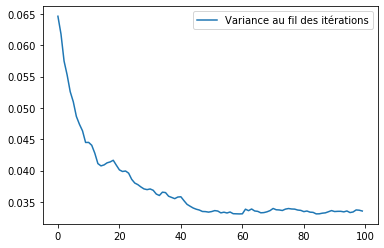

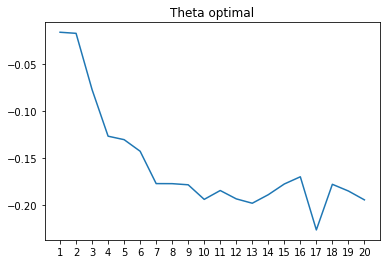

In [27]:
#lelong-Jourdain

d=3
teta=np.zeros((20,1))
mu=np.zeros((20,1))+d/2
n=10000
epsilon=0.001
m=100
X=np.random.randn(20,n)
sqrtcov=scipy.linalg.sqrtm(cov_c)

f=np.min(abs(2**0.5*sqrtcov.dot(X+teta)+2*mu),axis=0)<0.1
g=np.mean((f**2)*(-X)*np.exp(-2*teta.T.dot(X)-teta.T.dot(teta)),axis=1)
h=np.mean((np.apply_along_axis(lambda x:x.reshape(20,1).dot(x.reshape(20,1).T)+np.eye(20),0,X)*np.exp(-2*teta.T.dot(X)-teta.T.dot(teta))).T,axis=0)
i=0
l=[]
while i<m :
    teta=teta-np.linalg.inv(h).dot(g).reshape(20,1)  
    f=np.min(abs(2**0.5*sqrtcov.dot(X+teta)+2*mu),axis=0)<0.1
    g=np.mean((f**2)*(-X)*np.exp(-2*teta.T.dot(X)-teta.T.dot(teta)),axis=1)
    h=np.mean((np.apply_along_axis(lambda x:x.reshape(20,1).dot(x.reshape(20,1).T)+np.eye(20),0,X)*np.exp(-2*teta.T.dot(X)-teta.T.dot(teta))).T,axis=0)
    i+=1
    r=np.exp(-teta.T.dot(X)-0.5*teta.T.dot(teta))
    Z=np.min(abs(2**0.5*sqrtcov.dot(X+teta)+2*mu),axis=0)<0.1
    l.append(np.mean((Z*r)**2))
r=np.exp(-teta.T.dot(X)-0.5*teta.T.dot(teta))
Z=np.min(abs(2**0.5*sqrtcov.dot(X+teta)+2*mu),axis=0)<0.1
print("theta :",teta.reshape(20),"proba :",np.mean(Z*r),"variance :",np.mean((Z*r)**2))
plt.plot(range(i),l,label='Variance au fil des itérations')
plt.legend()
plt.show()
plt.plot(range(1,21),teta)
plt.title('Theta optimal')
plt.xticks(range(1,21))
plt.show()

Remarquons l'allure du changement de moyenne optimal

<h3>MCMC<h3>

In [41]:
#MCMC


sigma_c=1
r_c=1/57
v=8
r_a = 0.25
m=np.zeros(20)
covA=np.zeros((20,20))
covC=np.zeros((20,20))
for s in range(20):
    covC[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    covA[s,s]=(r_a**2)*((s+1)**2)
    for t in range(s):
        covC[t,s]=covC[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)
        covA[t,s]=covA[s,t]=(r_a**2)*((t+1)**2)
        
        
    

In [42]:
 
def NiveauxSplitting2(a, seuil, rho, rho_bar, n,d):

   
    mu1=np.zeros(20)+d/2
    
    XA = np.random.multivariate_normal(np.zeros(20), 2*covA,size=1)
    XC = np.random.multivariate_normal(2*mu1, 2*covC,size=1)
    X=np.concatenate((XA, XC), axis=1)

    YA = np.random.multivariate_normal(np.zeros(20), 2*covA,size=n)
    YC = np.random.multivariate_normal(2*mu1, 2*covC,size=n)
    Y=np.concatenate((YA, YC), axis=1)
   
    for i in range(n):
        XC = np.append(XC, rho*(XC[-1:,]-2*mu1) + rho_bar*(YC[i,:]-2*mu1)+2*mu1,axis=0)
        XA = np.append(XA, rho*(XA[-1:,]) + rho_bar*(YA[i,:]),axis=0)
        X=np.concatenate((XA, XC), axis=1)
       
    X=np.array(sorted(list(X),key=lambda x:min(x[:20]*x[:20]+x[20:]*x[20:])))
    
    quantiles = np.array([])    
    
    b=np.sqrt(np.min((X[int(np.ceil((1-seuil)*n)-1)][:20]*X[int(np.ceil((1-seuil)*n)-1)][:20]+X[int(np.ceil((1-seuil)*n)-1)][20:]*X[int(np.ceil((1-seuil)*n)-1)][20:])))
    quantiles = np.append(quantiles,np.sqrt(np.min((X[int(np.ceil((1-seuil)*n)-1)][:20]*X[int(np.ceil((1-seuil)*n)-1)][:20]+X[int(np.ceil((1-seuil)*n)-1)][20:]*X[int(np.ceil((1-seuil)*n)-1)][20:]))  ))
    #print(quantiles)
    while (quantiles[-1] > a ):
        
        ## On recupere la premiere valeur de la chaine
        ## precedente qui est inferieur au quantile:
        ## pour initialiser la chaine courante 
        startingPoint = (X[np.sqrt(np.amin(X[:,:20]*X[:,:20]+X[:,20:]*X[:,20:],axis=1)) <= quantiles[-1]][0])

        X = np.array([startingPoint])
        XA=X[:,:20]
        XC=X[:,20:]
        ## Simulation du processus AR(1) conditionnel
        YA = np.random.multivariate_normal(np.zeros(20), 2*covA,size=n)
        YC = np.random.multivariate_normal(2*mu1, 2*covC,size=n)
        Y=np.concatenate((YA, YC), axis=1)
        for i in range(n):
            
           
        
            newXA=rho*(XA[-1:,]) + rho_bar*(YA[i,:])
            newXC= rho*(XC[-1:,]-2*mu1) + rho_bar*(YC[i,:]-2*mu1)+2*mu1
            alpha=np.sqrt(np.amin(newXA*newXA+newXC*newXC))
            XC = np.append(XC, newXC*(alpha <=quantiles[-1] )+X[-1:,20:]*(alpha >quantiles[-1] ),axis=0)
            XA = np.append(XA, newXA*(alpha <=quantiles[-1] )+X[-1:,:20]*(alpha >quantiles[-1] ),axis=0)
            
            X=np.concatenate((XA, XC), axis=1)


        X=np.array(sorted(list(X),key=lambda x:min(x[:20]*x[:20]+x[20:]*x[20:])))

        quantiles = np.append(quantiles, np.sqrt(np.min((X[int(np.ceil((1-seuil)*n)-1)][:20]*X[int(np.ceil((1-seuil)*n)-1)][:20]+X[int(np.ceil((1-seuil)*n)-1)][20:]*X[int(np.ceil((1-seuil)*n)-1)][20:])) ))
          
    
         
        
        
    ## On selectionne les niveaux a_1, a_2,... strictement en dessous de a
    
    quantiles = quantiles[:-1]
    ## On rajoute a
    
    quantiles = np.append(quantiles, a)
    
    
    quantiles=list(dict.fromkeys(quantiles))
    
    #print(quantiles)
    return quantiles

In [43]:

    
    
def probaAR(a, seuil, rho, rho_bar, n,d):       
    #n = 1000
    mu1=np.zeros(20)+d/2.
    niveaux = NiveauxSplitting2(a, seuil, rho, rho_bar, 500,d)

    ## Une fois les niveaux a_1, ..., a_k trouves, on lance
    ## la simulation des chaines pour estimer chaque probabilite
    ## conditionnelle, avec une valeur de n plus importante
   
    XA = np.random.multivariate_normal(np.zeros(20), 2*covA,size=1)
    XC = np.random.multivariate_normal(2*mu1, 2*covC,size=1)
    X=np.concatenate((XA, XC), axis=1)

    YA = np.random.multivariate_normal(np.zeros(20), 2*covA,size=n)
    YC = np.random.multivariate_normal(2*mu1, 2*covC,size=n)
    Y=np.concatenate((YA, YC), axis=1)
    ## Niveau 0: pas de rejet
    for i in range(n):
        XC = np.append(XC, rho*(XC[-1:,]-2*mu1) + rho_bar*(YC[i,:]-2*mu1)+2*mu1,axis=0)
        XA = np.append(XA, rho*(XA[-1:,]) + rho_bar*(YA[i,:]),axis=0)
        X=np.concatenate((XA, XC), axis=1)
    
    
    l=np.sqrt(np.amin(X[:,:20]*X[:,:20]+X[:,20:]*X[:,20:],axis=1))
   
    P = [ np.mean(l<=niveaux[0]) ]


    
    ## Niveau l
    k = len(niveaux)
    for l in range(1,k):
        ## On recupere la premiere valeur de la chaine precedente 
        ## qui est inferieure le niveau l-1:
        ## pour initialiser la chaine au niveau courant
        m=np.sqrt(np.amin(X[:,:20]*X[:,:20]+X[:,20:]*X[:,20:],axis=1))
        a_l_moins_1 = niveaux[(l-1)]
        count_true=sum(m <= a_l_moins_1)
        if(count_true>0):
          startingPoint = (X[m <= a_l_moins_1][0])
        else:
          X=np.array(sorted(list(X),key=lambda x:min(x[:20]*x[:20]+x[20:]*x[20:])))
          startingPoint = X[0]
       
        X=np.array([startingPoint]) 
        XA=X[:,:20]
        XC=X[:,20:]    
      
        YA = np.random.multivariate_normal(np.zeros(20), 2*covA,size=n)
        YC = np.random.multivariate_normal(2*mu1, 2*covC,size=n)
        Y=np.concatenate((YA, YC), axis=1)
        for i in range(n):
         
          newXA=rho*(XA[-1:,]) + rho_bar*(YA[i,:])
          newXC= rho*(XC[-1:,]-2*mu1) + rho_bar*(YC[i,:]-2*mu1)+2*mu1
          alpha=np.sqrt(np.amin(newXA*newXA+newXC*newXC))
          XC = np.append(XC, newXC*(alpha <=a_l_moins_1 )+X[-1:,20:]*(alpha >a_l_moins_1 ),axis=0)
          XA = np.append(XA, newXA*(alpha <=a_l_moins_1 )+X[-1:,:20]*(alpha >a_l_moins_1 ),axis=0)
          X=np.concatenate((XA, XC), axis=1)
        
        P.append( np.mean(np.sqrt(np.amin(X[:,:20]*X[:,:20]+X[:,20:]*X[:,20:],axis=1))<=niveaux[l]) )
    #Estimateur par methode de splitting
    Proba_emp_split =np.prod(P)

    return(Proba_emp_split)
    
   
   


In [44]:
## Parametres du probleme
a = 0.1
seuil = 0.9
rho = 0.9

rho_bar = np.sqrt(1-rho**2)
d=8
n=1000
probaAR(a, seuil, rho, rho_bar, n,d)

1.8726346942041968e-10

In [48]:
#on calcule l'erreur de notre estimation
a = 0.1
seuil = 0.92
rho = 0.9
rho_bar = np.sqrt(1-rho**2)
d=6
n=1500
l=[]
for i in range(10):
  l.append(probaAR(a, seuil, rho, rho_bar, n,d))

h=[np.mean(l),np.var(l),2*((np.var(l)/n)**0.5)]
print(h)

[1.2659811259048047e-06, 7.301541765885647e-13, 4.4125704574954635e-08]


<h3>Trajectoires croisées<h3>

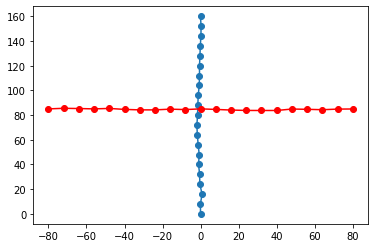

False 5.2812282187231645


In [51]:
#Trajectoires croisées

teta=np.pi/2  #angle entre les deux trajectoires 
sin=np.sin(teta)
cos=np.cos(teta)
d=5                     #d=distance de séparation minimale

pos=np.array([-10*v*sin,10*v*(1-cos)+d]) #on place les trajectoires de manieres à ce qu'elles se croisent vers le milieu


#simulation trajectoires croisées

MC1=np.append(0,np.random.multivariate_normal(np.zeros(20), cov_c))
MC2=np.append(0,np.random.multivariate_normal(np.zeros(20), cov_c))
MA1=np.append(0,np.random.multivariate_normal(np.zeros(20), cov_a))
MA2=np.append(0,np.random.multivariate_normal(np.zeros(20), cov_a))

T=np.array([MC2,MA2+v*np.arange(0,21)])
T1=np.array([MC1,MA1+v*np.arange(0,21)]).T
T2=np.array([[T[0][t]*cos+T[1][t]*sin,-T[0][t]*sin+T[1][t]*cos] for t in range(21)])+pos



plt.plot(T1[:,0],T1[:,1],marker="o")
plt.plot(T2[:,0],T2[:,1],"red",marker="o")
#plt.plot(T[0],T[1],"red",marker="o")
#A=np.array([[T[0][t]*cos+T[1][t]*sin,-T[0][t]*sin+T[1][t]*cos] for t in range(21)])
#plt.plot(A[:,0],A[:,1],"red",marker="o")
plt.show()

m=np.min(np.sum((T1-T2)**2,axis=1))
print(m<a**2,m**0.5)

5.044821638263724e-09 3.8225359056911484e-13


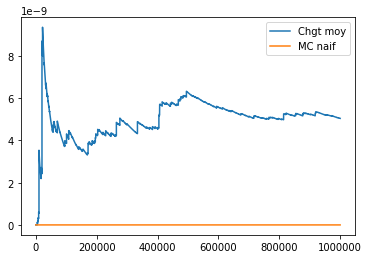

In [61]:
#Calcul de probabilité de conflit, changement de moyenne


N=1000000
i=10 #où on veut le pic sur l'allure
lbda=3

mu=lbda*(u_exp(i))

sqrt_cov_c=scipy.linalg.sqrtm(cov_c)
sqrt_cov_a=scipy.linalg.sqrtm(cov_a)

U = np.random.randn(20,N) 
MC1=sqrt_cov_c.dot(U).T

U = np.random.randn(20,N)
MC2_=sqrt_cov_c.dot(U).T #pour le MC naïf

U+=mu
r=np.exp(-mu.T.dot(U)+mu.T.dot(mu)/2)
MC2=sqrt_cov_c.dot(U).T


U=np.random.randn(20,N)
MA1_=sqrt_cov_a.dot(U).T+v*np.arange(1,21)
MA1=sqrt_cov_a.dot(U).T+v*np.arange(1,21)

MA2=np.random.multivariate_normal(np.zeros(20), cov_a,size=N)+v*np.arange(1,21)



X=MC1-(cos*MC2+sin*MA2+pos[0])
Y=MA1-(-sin*MC2+cos*MA2+pos[1])
X_=MC1-(cos*MC2_+sin*MA2+pos[0])
Y_=MA1_-(-sin*MC2_+cos*MA2+pos[1])

Z=np.min(X**2+Y**2,axis=1)<a**2
W=np.min(X_**2+Y_**2,axis=1)<a**2
#r=np.exp(-mu.T.dot(U)+0.5*mu.T.dot(mu))
print(np.mean(Z*r),np.mean((Z*r)**2)-np.mean(Z*r)**2)
plt.plot(np.cumsum(Z*r)/np.arange(1,N+1),label='Chgt moy')
plt.plot(np.cumsum(W)/np.arange(1,N+1),label='MC naif')
plt.legend()
plt.show()

<h3>Bonus : Changement de variance<h3>

7.813251830380512e-05 1.818976486619661e-05


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


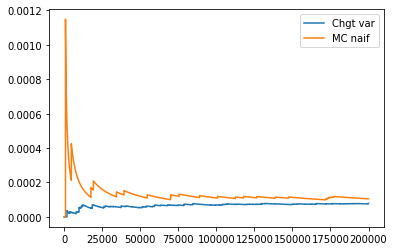

In [46]:
#Chgt de variance
d=6
mu=np.zeros((20,1))+d/2
N=200000
X=np.random.randn(20,N)
Y=np.random.multivariate_normal(np.zeros(20), 2*cov_a,size=N)
sigma=1.2
Z=np.min((((2**0.5)*scipy.linalg.sqrtm(cov_c).dot(sigma*X)+2*mu)**2+Y.T**2)**0.5,axis=0)<a
r=(sigma**20)*np.exp((-(sigma**2-1)*(np.sum(X**2,axis=0)/2)))
W=np.cumsum(Z*r)/np.arange(1,N+1)
P=np.cumsum(np.min((((2**0.5)*scipy.linalg.sqrtm(cov_c).dot(X)+2*mu)**2+Y.T**2)**0.5,axis=0)<a)/np.arange(1,N+1)
print(np.mean(Z*r),np.mean((Z*r)**2)-np.mean(Z*r)**2)
plt.plot(range(N),W,label='Chgt var')
plt.plot(range(N),P,label='MC naif')
plt.legend()
plt.show()